# Exp8

## wanderer1
- 1 agent and 1 goal landmark
- the agent gets reward, when it gets close to the goal.
- but the agent is blind at start so that it cannot have a clue to the goal.
- the agent can borrow money, when it says "A"
    - If it has money, it can see its surrounding area.
    - the visible area gets wider, as the money is larger.
    - but when the agent has the money (= debt), it gets negative reward.
- **in summary, there is a trade-off between the visible range and the debt.**

### In the following, I made experiments with different parameter set.
A parameter of "PENALTY_WEIGHT" controls heaviness of the penalty.

### wanderer1-1
no penalty for the debt (PENALTY_WEIGHT = 0)
#### results
the agent borrows the money with no limit, which is expected.

### wanderer1-2
light penalty (PENALTY_WEIGHT = 0.01)
#### results
the agent borrows the money with no limit. (penalty < rewards)

### wanderer1-3
modest penalty (PENALTY_WEIGHT = 0.02)
#### results
the agent acts are unstable. (penalty ~ rewards)

### wanderer1-4
heavy penalty (PENALTY_WEIGHT = 0.1)
#### results
the agent doesn't borrow the money at all. (penalty > rewards)

In [16]:
%matplotlib inline
import glob

def plot_curves(curve_dir, y_colns_template=None):
    print(curve_dir)
    df_r =  pd.read_csv(osp.join(curve_dir, 'agents_rewards.csv'))
    df_m = pd.read_csv(osp.join(curve_dir, 'agents_energy.csv'))
    _df = pd.merge(df_r, df_m, on=['episode', 'step']).drop(['step'], axis=1)
    if y_colns_template is not None:
        y_colns =  [coln for coln in _df.columns 
                             if '_'.join(coln.split('_')[1:]) in y_colns_template]
        _df = _df[['episode'] + y_colns]
    _df.plot(x='episode')
    plt.ylim([-200, 10])
    plt.show()
    
def get_all_exp_curves(pdir):
    curve_dirs = [osp.join(d, 'learning_curves') for d in glob.glob(pdir+'/*')]
    return curve_dirs

../exp_results/exp7_180711/wanderer1_1agent-1__2018-07-11_19-18-16/learning_curves


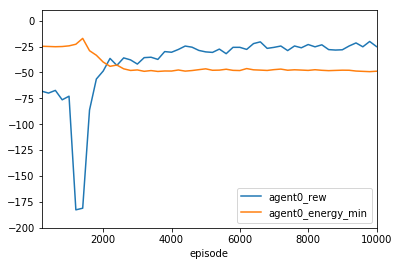

../exp_results/exp7_180711/wanderer1_1agent-2__2018-07-11_19-18-19/learning_curves


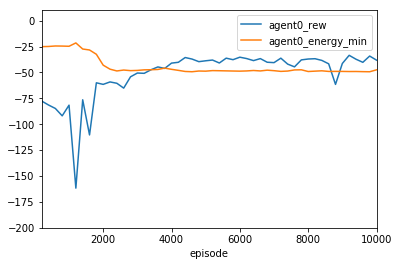

../exp_results/exp7_180711/wanderer1_1agent-3__2018-07-11_19-31-31/learning_curves


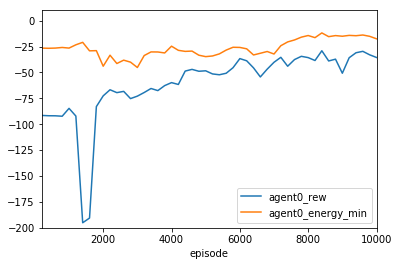

../exp_results/exp7_180711/wanderer1_1agent-4__2018-07-11_19-18-23/learning_curves


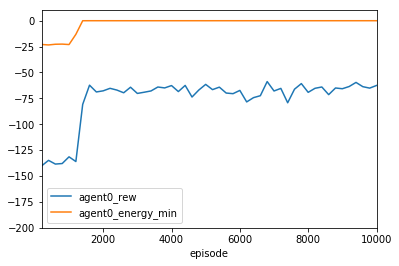

In [18]:
exp_dir = '../exp_results/exp7_180711'
y_columns = ['rew', 'energy_min']

curve_dirs = get_all_exp_curves(exp_dir)
for curve_dir in curve_dirs:
    plot_curves(curve_dir, y_columns)

In [24]:
template =\
"""{
 'p_dir': './exp_results/exp7_180711',
 'exp_dir': '%s',
 'n_epis': [10000],
 'num_episodes': 5,
 'max_episode_len': 50,
 'good_policy': 'ddpg',
 'adv_policy': 'ddpg',
 'outfile_suffix': None,
 'display_speed': 'very-slow',
 'exec': True,
},"""

for d in glob.glob(exp_dir+'/*'):
    dn = osp.basename(d)
    print(template % dn)

{
 'p_dir': './exp_results/exp7_180711',
 'exp_dir': 'wanderer1_1agent-1__2018-07-11_19-18-16',
 'n_epis': [10000],
 'num_episodes': 5,
 'max_episode_len': 50,
 'good_policy': 'ddpg',
 'adv_policy': 'ddpg',
 'outfile_suffix': None,
 'display_speed': 'very-slow',
 'exec': True,
},
{
 'p_dir': './exp_results/exp7_180711',
 'exp_dir': 'wanderer1_1agent-2__2018-07-11_19-18-19',
 'n_epis': [10000],
 'num_episodes': 5,
 'max_episode_len': 50,
 'good_policy': 'ddpg',
 'adv_policy': 'ddpg',
 'outfile_suffix': None,
 'display_speed': 'very-slow',
 'exec': True,
},
{
 'p_dir': './exp_results/exp7_180711',
 'exp_dir': 'wanderer1_1agent-3__2018-07-11_19-31-31',
 'n_epis': [10000],
 'num_episodes': 5,
 'max_episode_len': 50,
 'good_policy': 'ddpg',
 'adv_policy': 'ddpg',
 'outfile_suffix': None,
 'display_speed': 'very-slow',
 'exec': True,
},
{
 'p_dir': './exp_results/exp7_180711',
 'exp_dir': 'wanderer1_1agent-4__2018-07-11_19-18-23',
 'n_epis': [10000],
 'num_episodes': 5,
 'max_episode_len': 5

FileNotFoundError: File b'../exp_results/exp7_180711/wanderer1_1agent-1__2018-07-11_19-18-16/videos/video-10000_actions_agent0.csv ' does not exist